In [1]:
#Build models using Keras
import keras
from keras import models
from keras import layers
from keras.layers.core import Permute
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.enable_eager_execution() 

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import tensorflow as tf
import timeit


with tf.device('/cpu:0'):
	cpu_a = tf.random.normal([10000, 1000])
	cpu_b = tf.random.normal([1000, 2000])
	print(cpu_a.device, cpu_b.device)

with tf.device('/gpu:0'):
	gpu_a = tf.random.normal([10000, 1000])
	gpu_b = tf.random.normal([1000, 2000])
	print(gpu_a.device, gpu_b.device)

def cpu_run():
	with tf.device('/cpu:0'):
		c = tf.matmul(cpu_a, cpu_b)
	return c

def gpu_run():
	with tf.device('/gpu:0'):
		c = tf.matmul(gpu_a, gpu_b)
	return c


# warm up
cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('warmup:', cpu_time, gpu_time)


cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('run time:', cpu_time, gpu_time)


/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 1.3481895000000002 0.19397079999999978
run time: 1.3459190000000003 0.0006443000000002641


In [3]:
from PIL import Image
import glob
import cv2
import numpy as np
import pandas as pd
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [5]:
BASE_PATH = 'Data\\dogs-vs-cats\\train\\'
TRAIN_PATH='Data\\dogs-vs-cats\\train_data\\'
VAL_PATH='Data\\dogs-vs-cats\\validation_data\\'
batch_size = 5 
epochs = 30
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
import os

In [7]:
#import all the images in the file Left & Right
      
image_list = []
files = glob.glob (r"C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\*.png")

for filename in files:
    print(filename)
    image = cv2.imread(filename)
    #image = tf.image.resize(image, [125, 125])
    image_list.append(image) #convert images into array
    #print(filename)

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L10.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L11.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L12.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L9.png
C

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT161_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT161_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT161_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT161_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT162_L1.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT213_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT214_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT214_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT214_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_R1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_R4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT217_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT217_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT219_L1.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT266_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L5.png
C:\Users\

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT329_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT329_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT329_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT329_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT329_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT329_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L6.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT400_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT400_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT400_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT401_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT401_L2.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT450_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT450_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT451_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT451_L3.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT509_R6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT509_R7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT510_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT510_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT510_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT510_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_R1.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT540_R3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT540_R4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT543_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT543_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT543_L4.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT575_L9.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT578_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT578_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT578_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT578_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT578_L5.png
C:\U

In [8]:
print('image_list shape:', np.array(image_list).shape)

image_list shape: (1224, 224, 224, 3)


In [9]:
#convert list into array
image_list = np.asarray(image_list)

In [10]:
image_list
print(type(image_list))

<class 'numpy.ndarray'>


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from PIL import Image

In [12]:
X = image_list.reshape(1224,3,224,224).transpose(0,2,3,1).astype("uint8") #48images with 125*125 pixels

In [13]:
X[0].max()

255

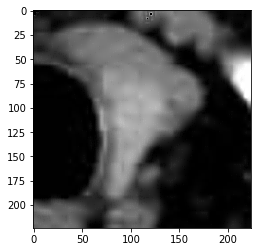

In [14]:
plt.imshow(image_list[1018])

In [15]:
#Labels
df = pd.read_csv("Left-ChangedNormal.csv")

In [16]:
df

,Name,Size,Kind,Type,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,CT101_L1,125*125,Medullary,1,0,NaN,NaN,NaN,Normal,0.0,257.0,Normal,257.0
1,CT101_L10,125*125,Medullary,1,1,NaN,NaN,NaN,Nodule,1.0,371.0,Benign,627.0
2,CT101_L11,125*125,Medullary,1,2,NaN,NaN,NaN,Thyroiditis,2.0,108.0,NaN,NaN
3,CT101_L12,125*125,Medullary,1,3,NaN,NaN,NaN,Goiter,3.0,211.0,NaN,NaN
4,CT101_L2,125*125,Medullary,1,4,NaN,NaN,NaN,Adenoma,4.0,88.0,NaN,1180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,CT99_L2,125*125,Papillary,1,1219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1220,CT99_L3,125*125,Papillary,1,1220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,CT99_L6,125*125,Papillary,1,1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,CT99_L7,125*125,Papillary,1,1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1224 non-null   object 
 1   Size         1224 non-null   object 
 2   Kind         1224 non-null   object 
 3   Type         1224 non-null   int64  
 4   Unnamed: 4   1224 non-null   int64  
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   10 non-null     object 
 9   Unnamed: 9   8 non-null      float64
 10  Unnamed: 10  8 non-null      float64
 11  Unnamed: 11  3 non-null      object 
 12  Unnamed: 12  3 non-null      float64
dtypes: float64(6), int64(2), object(5)
memory usage: 124.4+ KB


In [18]:
#Extract type from df table
Label = df["Type"]

In [19]:
Label

0       1
1       1
2       1
3       1
4       1
       ..
1219    1
1220    1
1221    1
1222    1
1223    1
Name: Type, Length: 1224, dtype: int64

In [20]:
#Stack into array
label = np.asarray(Label)

In [21]:
label

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
def one_hot_encode(vec, vals = 2):
    #to one-hot encode the 4- possible labesl
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [23]:
class CifarHelper():
    def __init__(self):
        self.i = 0
        
        #self.all_train_batches = [X]
        
        self.images = None
        self.labels = None
        
    def set_up_images(self):
        print("Setting up images and labels")
        self.images = np.vstack([X])
        all_len = len(self.images)
        
        self.images = self.images.reshape(all_len, 3, 224, 224).transpose(0,2,3,1)/255
        self.labels = one_hot_encode(np.hstack([label]), 2)

In [24]:
#before tensorflow run:
ch = CifarHelper()
ch.set_up_images()

Setting up images and labels


1


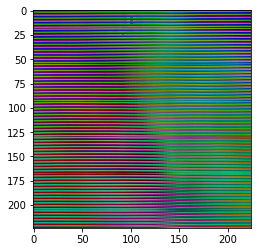

In [25]:
#Check the image and its label
index = 1090
plt.imshow(X[index])
print(label[index])

In [26]:
#Encoding data

def vectorize_sequences(sequences, dimension = 1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [27]:
def to_one_hot(labels, dimension=2):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [28]:
one_hot_labels = to_one_hot(label)

In [29]:
one_hot_labels[290]

array([0., 1.])

In [30]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

In [31]:
kf = StratifiedKFold(n_splits=10)

In [32]:
kf.get_n_splits(X, label)

10

In [33]:
print(kf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [34]:
y=label

In [35]:
for train_index, test_index in kf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [  80   81   82 ... 1221 1222 1223] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 147]
Train: [   0    1    2 ... 1221 1222 1223] Test: [ 80  81  82  83  84  85  86  87  88 112 113 114 115 116 117 137 138 139
 140 141 142 143 144 145 146 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 212 213 214 215 221 222 223
 224 225 226 227 228 229 230 231 232 

In [36]:
from tensorflow.keras import layers, Model, Sequential, regularizers

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model, Sequential, regularizers

cfgs = {
    'vgg8': [64,'M',128,'M',256,'M',512,'M',512,'M'],
    'vgg11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'vgg19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

def features(cfg):
    feature_layers = []
    for v in cfg:
        if v == "M":
            feature_layers.append(layers.MaxPool2D(pool_size=[2,2], strides=2, padding='same'))
        else:
            conv2d = layers.Conv2D(v, kernel_size=[3, 3], padding='same', activation=tf.nn.relu)
            feature_layers.append(conv2d)
    return Sequential(feature_layers, name="feature")

def VGG(feature, im_height=224, im_width=224, class_num=2):
    input_image = layers.Input(shape=(im_height, im_width, 3), dtype="float32")
    x = feature(input_image)
    x = layers.Flatten()(x)
    x = layers.Dropout(rate=0.5)(x)
#     x = layers.Dense(4096, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001))(x)
#     x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001))(x)
    output = layers.Dense(class_num, activation="relu")(x)
    model = models.Model(inputs=input_image, outputs=output)
    return model

def vgg(model_name="vgg16", im_height=224, im_width=224, class_num=2):
    try:
        cfg = cfgs[model_name]
    except:
        print("Warning: model number {} not in cfgs dict!".format(model_name))
        exit(-1)
    model = VGG(features(cfg), im_height=im_height, im_width=im_width, class_num=class_num)
    return model



In [38]:
def load_and_preprocess_from_path_label(image, label):
#     image = tf.image.decode_jpeg(image, channels=1)
#   image = tf.image.resize(image, [im_height, im_width])
    image = 2*tf.cast(image, dtype=tf.float32) / 255.-1
    label = tf.cast(label, dtype=tf.int32)

    return image, label

In [39]:
import time
from tensorflow.keras import optimizers

In [40]:
CV_summary = []
CM_summary_final = np.mat(np.zeros((2,2)))
t_CV = time.perf_counter()

fold = 0

for i in kf.split(X, y):
    fold += 1
    train_image = X[i[0]]
    train_label = one_hot_labels[i[0]]
    
    test_image = X[i[1]]
    test_label = one_hot_labels[i[1]]

    train_dataset = tf.data.Dataset.from_tensor_slices((train_image,train_label))
    train_db = train_dataset.shuffle(30).map(load_and_preprocess_from_path_label).batch(10)
    
    test_dataset = tf.data.Dataset.from_tensor_slices((test_image,test_label))
    test_db = test_dataset.shuffle(30).map(load_and_preprocess_from_path_label).batch(10)
    
    #print(train_db, test_db)
    
    #print(train_image[1])
    
    t_fold = time.perf_counter()

    model = vgg("vgg16")
    model.summary()
    
    optimizer = optimizers.Adam(lr=1e-5)
    
    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

    test_loss = tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

    
    current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    #CV_log_dir = 'logs/CV' + TOT + str(fold) + '%%' + current_time
    #CV_summary_writer = tf.summary.create_file_writer(CV_log_dir)

    CM_summary = np.mat(np.zeros((2,2)))
    Epoch_summary = []

    epochs = 30   #35

    for epoch in range(1,epochs+1):
        train_loss.reset_states()  # clear history info
        train_accuracy.reset_states()  # clear history info
        test_loss.reset_states()  # clear history info
        test_accuracy.reset_states()  # clear history info
        summary = []

        t1 = time.perf_counter()
        for step, (x,y) in enumerate(train_db):

            with tf.GradientTape() as tape:

                logits = model(x, training=True)
                # [b] => [b, 2]
                #y_onehot = tf.one_hot(y, depth=2)
                # compute loss
                loss = tf.losses.categorical_crossentropy(y, logits, from_logits=True)
#                 loss=tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = logits, dim=-1,name=None)
                loss = tf.reduce_mean(loss)
                train_loss(loss)
                train_accuracy(y, logits)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))


    #     with CV_summary_writer.as_default():
    #         tf.summary.scalar('train-CrossEntropy', float(loss), step=epoch)
    #         tf.summary.scalar('train-Accuracy', float(train_accuracy.result() * 100), step=epoch)
        print('-----------------------------------------------------------------')
        print('Training time: ',time.perf_counter() - t1)

        test_pred = []
        test_GT = []
        
        t2 = time.perf_counter()
        for xt,yt in test_db:

            logits = model(xt, training=False)
            prob = tf.nn.softmax(logits, axis=1)
            pred = tf.argmax(prob, axis=1)
            pred = tf.cast(pred, dtype=tf.int32)

            new_label = tf.argmax(yt,axis=1)
            test_pred.extend(pred)
            test_GT.extend(new_label)
            #print(pred,label)
            #yt_onehot = tf.one_hot(yt, depth=2)
            t_loss = tf.losses.categorical_crossentropy(yt, logits, from_logits=True)
#             t_loss=tf.nn.softmax_cross_entropy_with_logits(labels = yt, logits = logits, dim=-1,name=None)

            test_loss(t_loss)
            test_accuracy(yt, logits)
 
        CM = tf.math.confusion_matrix(test_GT,test_pred)
        TP = CM[1,1]
        TN = CM[0,0]
        FP = CM[0,1]
        FN = CM[1,0]

        Acc = ((TP + TN) / (TP + TN + FP + FN))
        PPV = TP / (TP + FP)
        Sensitivity = TP / (TP + FN)
        Specificity = TN / (TN + FP)
        F1 = 2*(PPV*Sensitivity)/(PPV+Sensitivity)
        NPV = TN / (TN + FN)
        
#         CM = np.mat(np.array(tf.math.confusion_matrix(test_GT,test_pred,num_classes=2)))  
#         FP = CM.sum(axis=0)-np.diag(CM)
#         FN = CM.sum(axis=1)-np.diag(CM)
#         TP = np.diag(CM)
#         TN = CM.sum()-(FP+FN+TP)
        
#         FP = np.sum(FP.astype(float))
#         FN = np.sum(FN.astype(float))
#         TP = np.sum(TP.astype(float))
#         TN = np.sum(TN.astype(float))
        
        #Normal - 0
        
        
#         Acc = ((TP+TN) / (TP + TN + FP + FN))
#         Precision = TP / (TP + FP)
#         Re_call = TP / (TP + FN)
# #         TNR = TP / (TP + FN)

        if epoch > 20:    #25
            summary = [train_loss.result().numpy(),train_accuracy.result().numpy(), test_loss.result().numpy(),
                          Acc.numpy(), F1, Sensitivity, Specificity, PPV, NPV]
            Epoch_summary.append(summary)
                

        print('Test time: ', time.perf_counter() - t2)
        template1 = 'Fold {}, Epoch {}'
        template2 = 'Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
        print(template1.format(fold, epoch))
        print(template2.format(loss,
                            train_accuracy.result(),
                            test_loss.result(),
                            Acc))

        print(CM)
        print('Acc:', float(Acc),'F1:',float(F1), 'Sensitivity:',float(Sensitivity), 'Specificity:', float(Specificity),
              'PPV:',float(PPV), 'NPV:',float(NPV))
        print('-----------------------------------------------------------------')

        
    print('Fold time: ', time.perf_counter() - t_fold)
    print('Summary for fold: ',fold)
    print(Epoch_summary)
    epoch_mean = np.mean(Epoch_summary,axis=0)
    print('Mean:')
    print(epoch_mean)

    CV_summary.append(epoch_mean)
    
print('_________________________________________________________________')     
print('Cross validation summary: ')
print('Total time: ', time.perf_counter() - t_CV)
print(CV_summary)
print('Mean:')
print(np.mean(CV_summary,axis=0))


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1605696   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_________________________________________________

-----------------------------------------------------------------
Training time:  52.814712100000065
Test time:  2.0089571999999407
Fold 1, Epoch 15
Loss: 0.17686842381954193, Accuracy: 0.7901907563209534, Test Loss: 0.5899600982666016, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.817516700000056
Test time:  2.004589600000031
Fold 1, Epoch 16
Loss: 0.18677951395511627, Accuracy: 0.7901907563209534, Test Loss: 0.6037539839744568, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-------------------------------------------------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  53.05965319999996
Test time:  2.006918499999756
Fold 2, Epoch 15
Loss: 0.037322185933589935, Accuracy: 0.7901907563209534, Test Loss: 0.5497400760650635, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.93500360000007
Test time:  2.0090009000000464
Fold 2, Epoch 16
Loss: 0.02420225739479065, Accuracy: 0.7901907563209534, Test Loss: 0.557158350944519, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
---------------------------------------------------

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  52.908277
Test time:  2.0062984999995024
Fold 3, Epoch 15
Loss: 0.28931066393852234, Accuracy: 0.7901907563209534, Test Loss: 0.6403841376304626, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.870854800000416
Test time:  2.0057772999998633
Fold 3, Epoch 16
Loss: 0.29269516468048096, Accuracy: 0.7901907563209534, Test Loss: 0.6433981657028198, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
---------------------------------------------------------

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  52.93824839999979
Test time:  2.0041117999999187
Fold 4, Epoch 15
Loss: 0.1476142704486847, Accuracy: 0.7901907563209534, Test Loss: 0.48756882548332214, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.91153109999959
Test time:  2.0049496999999974
Fold 4, Epoch 16
Loss: 0.14484018087387085, Accuracy: 0.7901907563209534, Test Loss: 0.4895361065864563, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
--------------------------------------------------

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  52.82600529999945
Test time:  1.9902296000000206
Fold 5, Epoch 15
Loss: 0.6774041652679443, Accuracy: 0.7894737124443054, Test Loss: 0.475276380777359, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 0 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7950819672131147 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.85802270000022
Test time:  1.9858605999997962
Fold 5, Epoch 16
Loss: 0.6229239106178284, Accuracy: 0.7894737124443054, Test Loss: 0.4764845371246338, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 0 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7950819672131147 NPV: nan
-----------------------------------------------------

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  52.8774386999994
Test time:  1.984645200000159
Fold 6, Epoch 15
Loss: 0.14485153555870056, Accuracy: 0.7894737124443054, Test Loss: 0.46835240721702576, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 0 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7950819672131147 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.88171490000059
Test time:  1.9886554999993677
Fold 6, Epoch 16
Loss: 0.12544211745262146, Accuracy: 0.7894737124443054, Test Loss: 0.46823814511299133, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 0 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7950819672131147 NPV: nan
--------------------------------------------------

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  52.840582700000596
Test time:  1.9849238000006153
Fold 7, Epoch 15
Loss: 0.18499475717544556, Accuracy: 0.7894737124443054, Test Loss: 0.5093034505844116, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 0 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7950819672131147 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.82425710000098
Test time:  1.987232400000721
Fold 7, Epoch 16
Loss: 0.16253553330898285, Accuracy: 0.7894737124443054, Test Loss: 0.5165581107139587, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 0 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7950819672131147 NPV: nan
--------------------------------------------------

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  52.85841209999853
Test time:  1.9836771999998746
Fold 8, Epoch 15
Loss: 0.055633436888456345, Accuracy: 0.790381133556366, Test Loss: 0.4683035910129547, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.832657400000244
Test time:  1.9774133999999322
Fold 8, Epoch 16
Loss: 0.04405208304524422, Accuracy: 0.790381133556366, Test Loss: 0.4655841588973999, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
--------------------------------------------------

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  52.92639320000126
Test time:  1.984427000001233
Fold 9, Epoch 15
Loss: 0.14479577541351318, Accuracy: 0.790381133556366, Test Loss: 0.46421194076538086, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.94030639999983
Test time:  1.9832746000010957
Fold 9, Epoch 16
Loss: 0.13833992183208466, Accuracy: 0.790381133556366, Test Loss: 0.46416333317756653, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
---------------------------------------------------

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 130       
Total params: 16,320,514
Trainable params: 16,320,514
Non-trainable params: 0
_______________________________________________

-----------------------------------------------------------------
Training time:  52.848214100000405
Test time:  1.9811010000012175
Fold 10, Epoch 15
Loss: 0.20203834772109985, Accuracy: 0.790381133556366, Test Loss: 0.502751350402832, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  52.92091530000107
Test time:  1.981551999999283
Fold 10, Epoch 16
Loss: 0.20555444061756134, Accuracy: 0.790381133556366, Test Loss: 0.5071213245391846, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
---------------------------------------------------

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
from keras.utils import to_categorical

In [42]:
auc_score_2=roc_auc_score(test_GT,test_pred)

In [43]:
auc_score_2

0.5300480769230769

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [45]:
multilabel_confusion_matrix(test_GT,test_pred)

array([[[87,  9],
        [22,  4]],

       [[ 4, 22],
        [ 9, 87]]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(test_GT,test_pred))

              precision    recall  f1-score   support

           0       0.31      0.15      0.21        26
           1       0.80      0.91      0.85        96

    accuracy                           0.75       122
   macro avg       0.55      0.53      0.53       122
weighted avg       0.69      0.75      0.71       122



In [48]:
log_dir = r'C\Tensorboard_ex\logs_1\fit\'' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [49]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)